In [1]:
import os
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
def loadDataSet(label_dir, data_dir):
    """ Loads all labeled spectra from txt files, sorted by User."""
    userSet = dict()
    file_names = dict()
    for file in os.listdir(label_dir):
        labelDict = dict()
        with open(os.path.join(label_dir, file)) as f:
            user = file.split("_")[1]
            lines = f.readlines()
            for line in lines:
                line = line.split()
                #assert user == line[6]
                labels = np.asarray(line[1:3]).astype(float)
                """
                if labels[1] == -2 or labels[1] == -1:
                    labels[1] += 2
                elif labels[1] == 1 or labels[1] == 2:
                    labels[1] += 1
                """
                name = line[-1].split("\\")[1]
                path = os.path.join(data_dir, line[-1]+".dat")
                with open(path) as f:
                    lines = f.readlines()
                    w_raw = [line.split()[0] for line in lines]
                    w = np.asarray(w_raw).astype(float)
                    # read spectrum
                    spectrum_raw = [line.split()[1] for line in lines]
                    spectrum = np.asarray(spectrum_raw).astype(float)
                    labelDict[name] = labels
                    if name not in file_names:
                        file_names[name] = (w, spectrum)
        userSet[user] = labelDict
    return file_names, userSet

In [3]:
# Specify working directories
label_dir = 'LabeledSpectra_v3'
data_dir = "Maps_for_ISYS\\"

# Load dataset
file_names, userSet = loadDataSet(label_dir, data_dir)

# Readout
agree = []
disagree = []
for name in file_names:
    w, x = file_names[name]
    labels = []
    for user in userSet:
        try:
            label = userSet[user][name]
            labels.append(label[1])
        except(KeyError):
            pass
    if not labels.count(labels[0]) == len(labels):
        variance = np.std(labels)
        disagree.append((name, variance))
    else:
        agree.append(name)
print("Disagreement in {} of {} files.".format(len(disagree),len(file_names)))

Disagreement in 52 of 101 files.


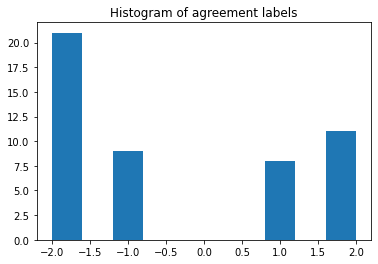

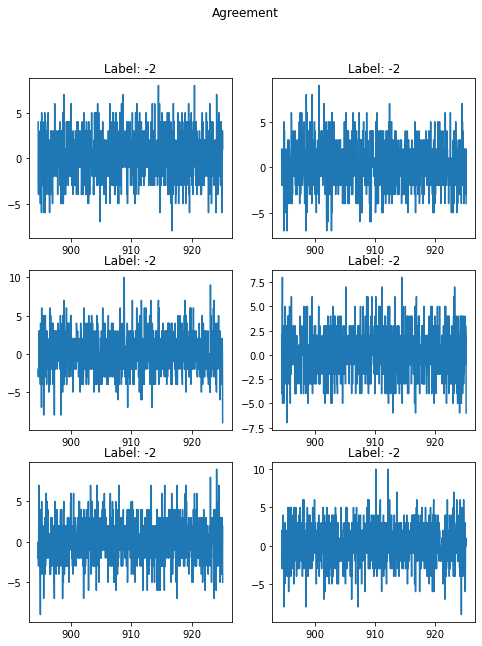

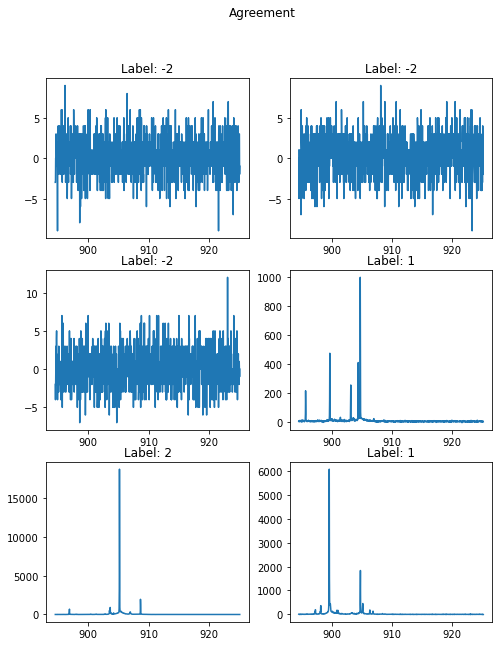

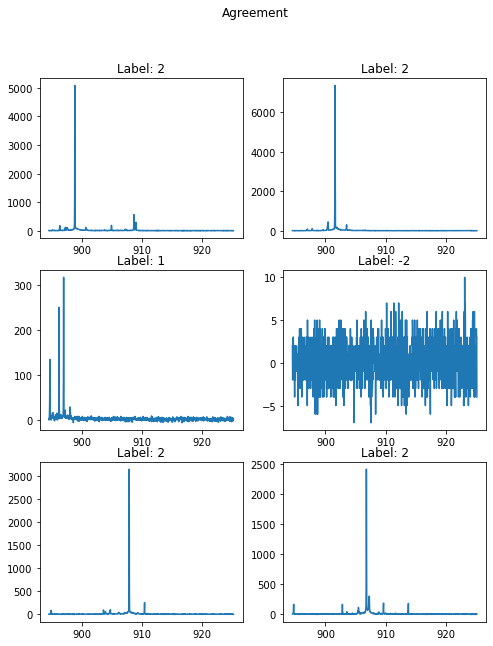

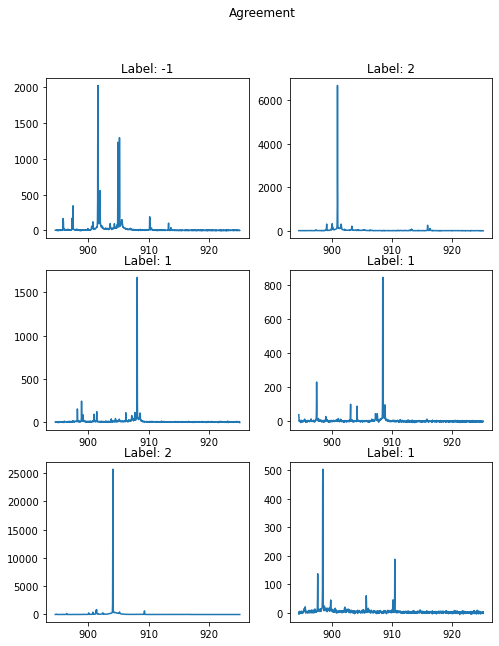

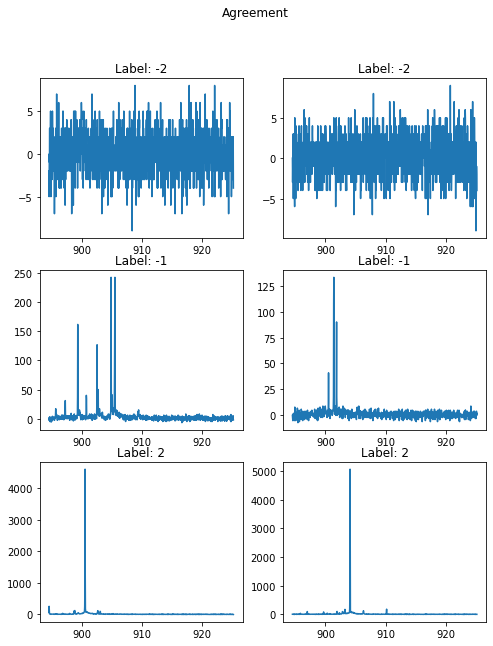

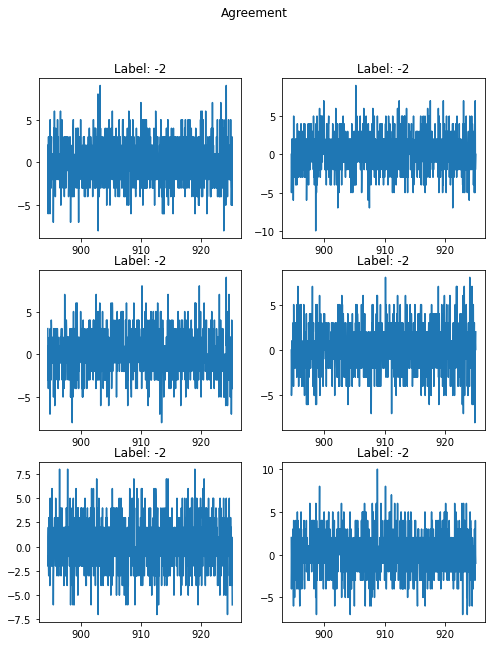

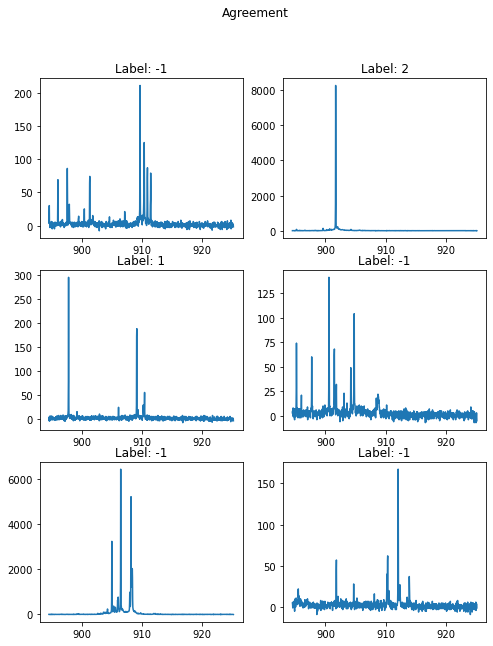

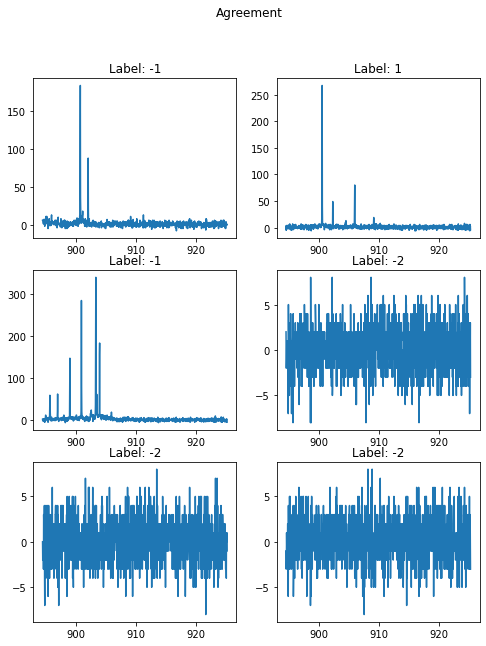

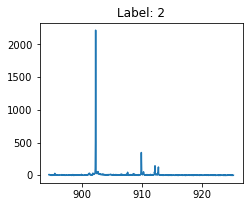

In [4]:
# Visualization: Agreement

plt.hist([userSet["AB"][name][1] for name in agree], align='mid')
plt.title('Histogram of agreement labels')
plt.show()
idx = 1
fig = plt.figure(figsize=(8,10))
for name in agree:
    w, x = file_names[name]
    label = userSet["AB"][name]
    ax = fig.add_subplot(3,2,idx)
    ax.plot(w, x)
    ax.title.set_text('Label: {}'.format(int(label[1])))
    if idx == 6:
        idx = 1
        plt.suptitle("Agreement")
        plt.show()
        fig = plt.figure(figsize=(8,10))
    else:
        idx += 1

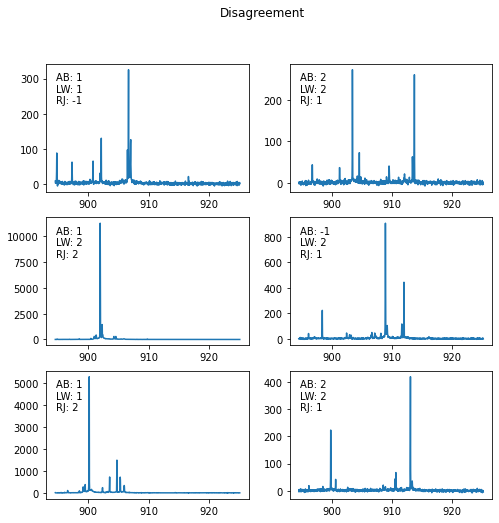

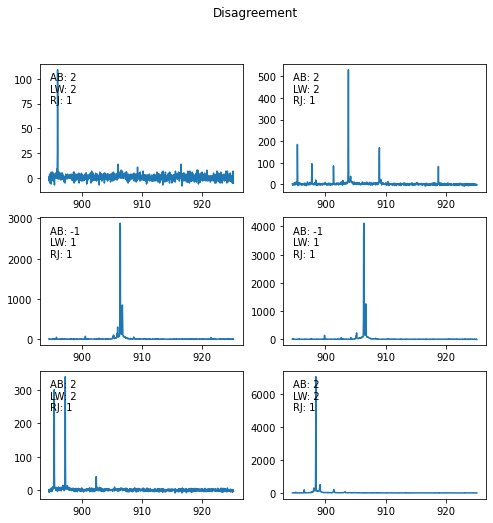

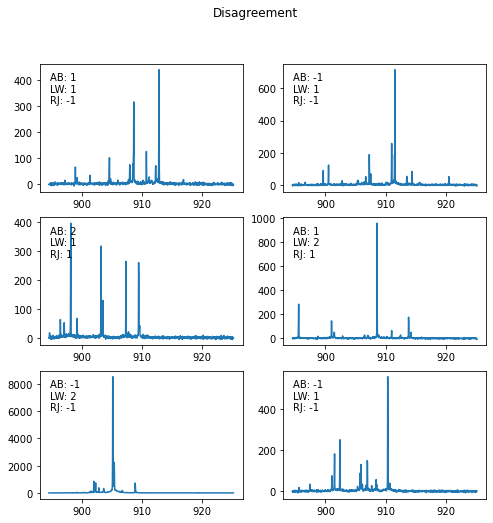

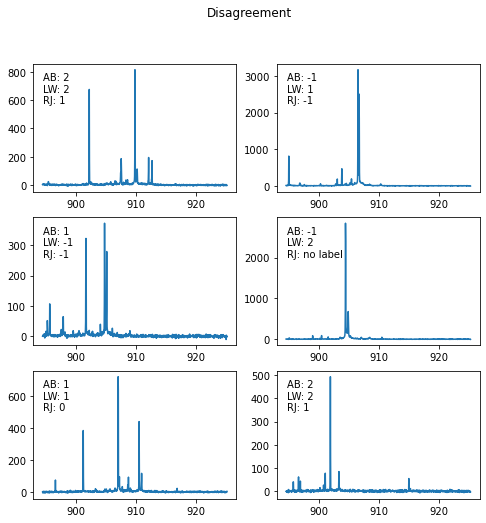

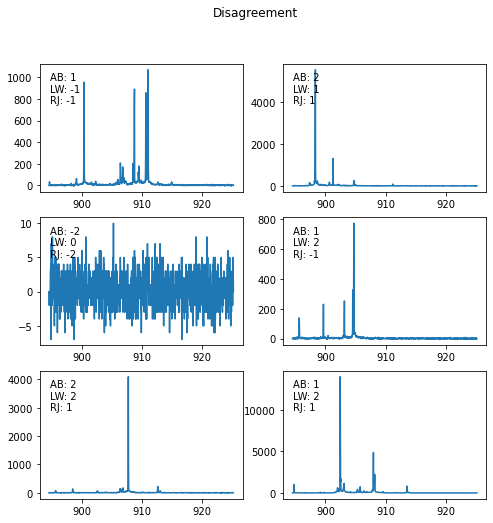

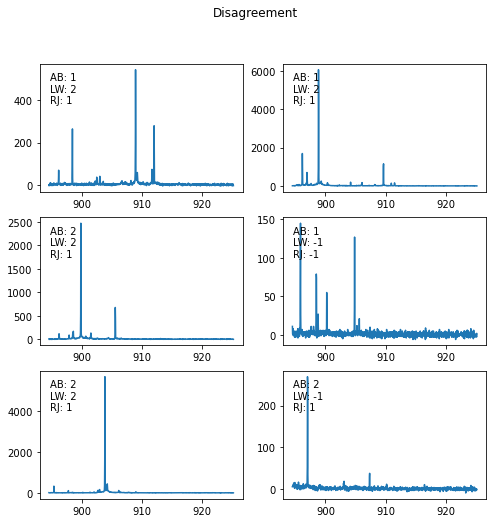

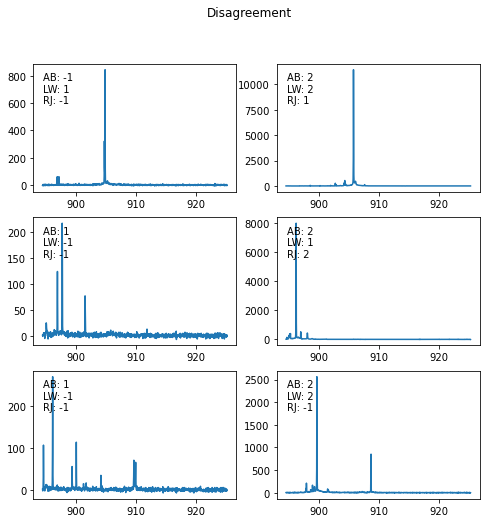

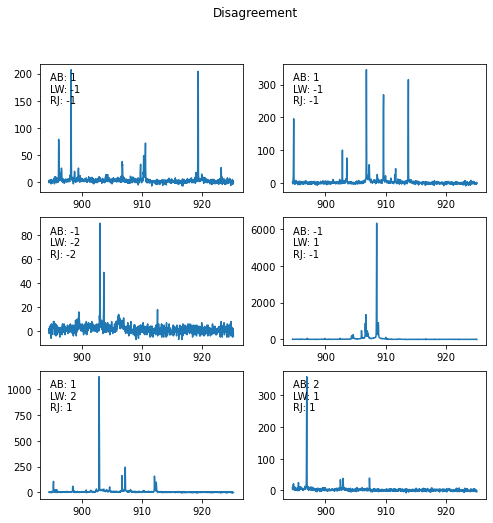

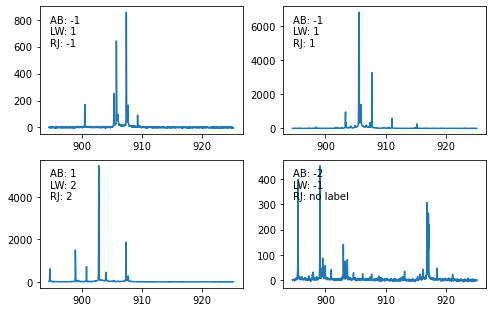

In [5]:
# Visualization: Disagreement

idx = 1
fig = plt.figure(figsize=(8,8))
for name, var in disagree:
    text = ""
    for user in userSet:
        try:
            label = userSet[user][name]
            labels.append(label[1])
            #text += (user + ": {0} peaks, {1} impression\n".format(label[0],label[1]))
            text += (user + ": {}\n".format(int(label[1])))
        except(KeyError):
            text += (user + ": no label\n")
    #text += "Var = {:.2f}".format(var)
    w, x = file_names[name]
    ax = fig.add_subplot(3,2,idx)
    ax.plot(w, x)
    ax.text(0.05, 0.6, text, fontsize = 10, transform=ax.transAxes)
    if idx == 6:
        idx = 1
        plt.suptitle("Disagreement")
        plt.show()
        fig = plt.figure(figsize=(8,8))
    else:
        idx += 1

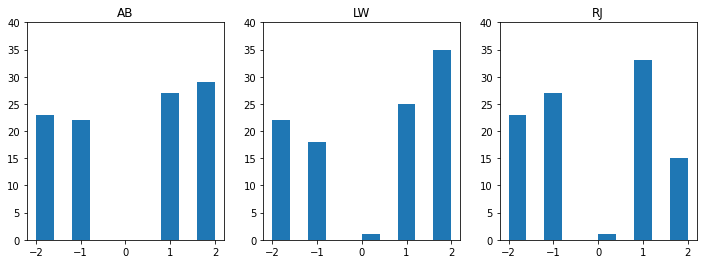

In [7]:
# User histogram

fig = plt.figure(figsize=(12,4))
idx = 1
for user in userSet:
    ax = fig.add_subplot(1,len(userSet),idx)
    labels = [label[1] for _, label in userSet[user].items()]
    ax.hist(labels, align='mid')
    plt.ylim(0,40)
    ax.title.set_text(user)
    idx+=1
plt.show()

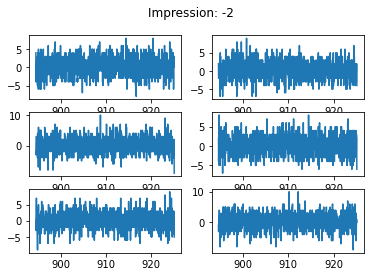

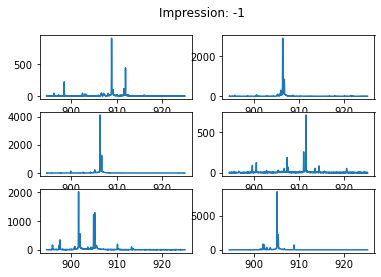

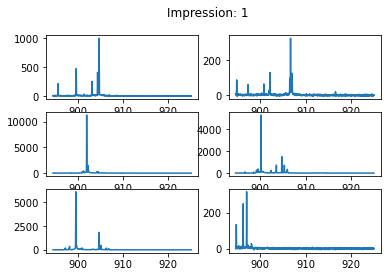

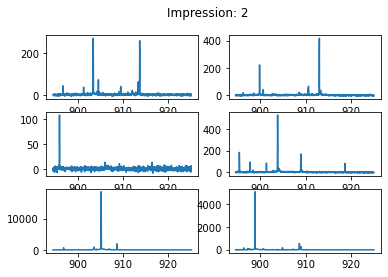

In [8]:
# Group by label

expert = userSet["AB"]
veryBad = [names for names, labels in expert.items() if labels[1]==-2]
Bad = [names for names, labels in expert.items() if labels[1]==-1]
Ok = [names for names, labels in expert.items() if labels[1]==1]
Good = [names for names, labels in expert.items() if labels[1]==2]

clusteredSpectra = {"-2": veryBad, "-1": Bad, "1": Ok, "2": Good}

impressions = ["-2","-1","1","2"]

for impression in impressions:
    idx = 0
    fig = plt.figure()
    for name in clusteredSpectra[impression]:
        idx+=1
        w, x = file_names[name]
        ax = fig.add_subplot(3,2,idx)
        ax.plot(w, x)
        if idx==6:
            break
    fig.suptitle("Impression: " + impression)
    plt.show()